<a href="https://colab.research.google.com/github/ftmhrahimi/Deep_Learning_F20_Assignments/blob/master/Assignmen_Set_3/p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries**

In [78]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils import data
from torchvision import datasets, transforms

# **Tensor conversion, resizing, and normalization of the dataset**

In [70]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                transforms.Resize
                                ])

#**Download the data by Torchvision** 

In [83]:
df = datasets.FashionMNIST('data/', download=True, transform=transform)

# **Split the data into two parts (training and test with a ratio of 70/30)**

In [87]:
train_dataset, test_dataset = torch.utils.data.dataset.random_split(df, [42000 ,18000])

In [88]:
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=64,shuffle=True)

#Examine a sample

In [89]:

dataiter = iter(train_loader)
(images , labels)=dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


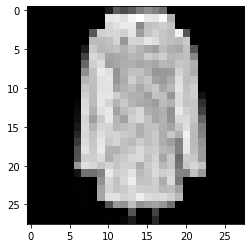

In [90]:
plt.imshow(images[1].numpy().squeeze(), cmap = 'Greys_r')

# **nn.Sequential**

In [1]:
# Define the network architecture
from torch import nn, optim
import torch.nn.functional as F

model = nn.Sequential(nn.Linear(784, 265),
                      
                      nn.ReLU(),

                      nn.Sigmoid(),

                      
                      nn.Softmax(),

                      nn.Dropout(0.2),

                      nn.LogSoftmax(dim = 1)
                     )

model=model.to("cuda")
                
print(model)


Sequential(
  (0): Linear(in_features=784, out_features=265, bias=True)
  (1): ReLU()
  (2): Sigmoid()
  (3): Softmax(dim=None)
  (4): Dropout(p=0.2, inplace=False)
  (5): LogSoftmax(dim=1)
)


In [108]:
# Define the loss
criterion = nn.NLLLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr = 0.002)

# Define the epochs
epochs = 30

train_losses, test_losses = [], []

for e in range(epochs):
  running_loss = 0
  for images, labels in train_loader:
    # Flatten Fashion-MNIST images into a 784 long vector
    images = images.view(images.shape[0], -1)
    
    # Training pass
    optimizer.zero_grad()
    
    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
  else:
    test_loss = 0
    accuracy = 0
    
    # Turn off gradients for validation, saves memory and computation
    with torch.no_grad():
      # Set the model to evaluation mode
      model.eval()
      
      # Validation pass
      for images, labels in test_loader:
        images = images.view(images.shape[0], -1)
        log_ps = model(images)
        test_loss += criterion(log_ps, labels)
        
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim = 1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
    
    model.train()
    train_losses.append(running_loss/len(train_loader))
    test_losses.append(test_loss/len(test_loader))
    
    print("Epoch: {}/{}..".format(e+1, epochs),
          "Training loss: {:.3f}..".format(running_loss/len(train_loader)),
          "Test loss: {:.3f}..".format(test_loss/len(test_loader)),
          "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch: 1/30.. Training loss: 5.578.. Test loss: 5.578.. Test Accuracy: 0.232
Epoch: 2/30.. Training loss: 5.578.. Test loss: 5.578.. Test Accuracy: 0.225
Epoch: 3/30.. Training loss: 5.578.. Test loss: 5.578.. Test Accuracy: 0.221
Epoch: 4/30.. Training loss: 5.578.. Test loss: 5.578.. Test Accuracy: 0.221
Epoch: 5/30.. Training loss: 5.578.. Test loss: 5.578.. Test Accuracy: 0.246
Epoch: 6/30.. Training loss: 5.578.. Test loss: 5.578.. Test Accuracy: 0.268
Epoch: 7/30.. Training loss: 5.578.. Test loss: 5.578.. Test Accuracy: 0.244
Epoch: 8/30.. Training loss: 5.578.. Test loss: 5.578.. Test Accuracy: 0.319
Epoch: 9/30.. Training loss: 5.578.. Test loss: 5.578.. Test Accuracy: 0.293
Epoch: 10/30.. Training loss: 5.578.. Test loss: 5.578.. Test Accuracy: 0.311
Epoch: 11/30.. Training loss: 5.578.. Test loss: 5.578.. Test Accuracy: 0.316
Epoch: 12/30.. Training loss: 5.578.. Test loss: 5.578.. Test Accuracy: 0.322
Epoch: 13/30.. Training loss: 5.578.. Test loss: 5.578.. Test Accuracy: 0

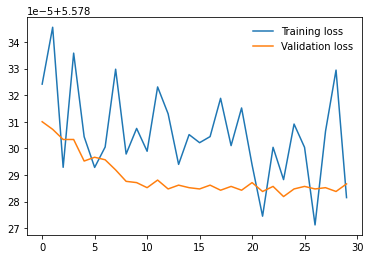

In [109]:
plt.plot(train_losses, label = "Training loss")
plt.plot(test_losses, label = "Validation loss")
plt.legend(frameon = False)